In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

path_file = r'H:\Python_exercises\dat206\data\covid_19_data.csv'
data = pd.read_csv(path_file, parse_dates=['ObservationDate'])
df = pd.DataFrame(data)

## Y1_1

#### Trực quan hóa phân phối của số ca nhiễm trong toàn bộ thời gian quan sát.

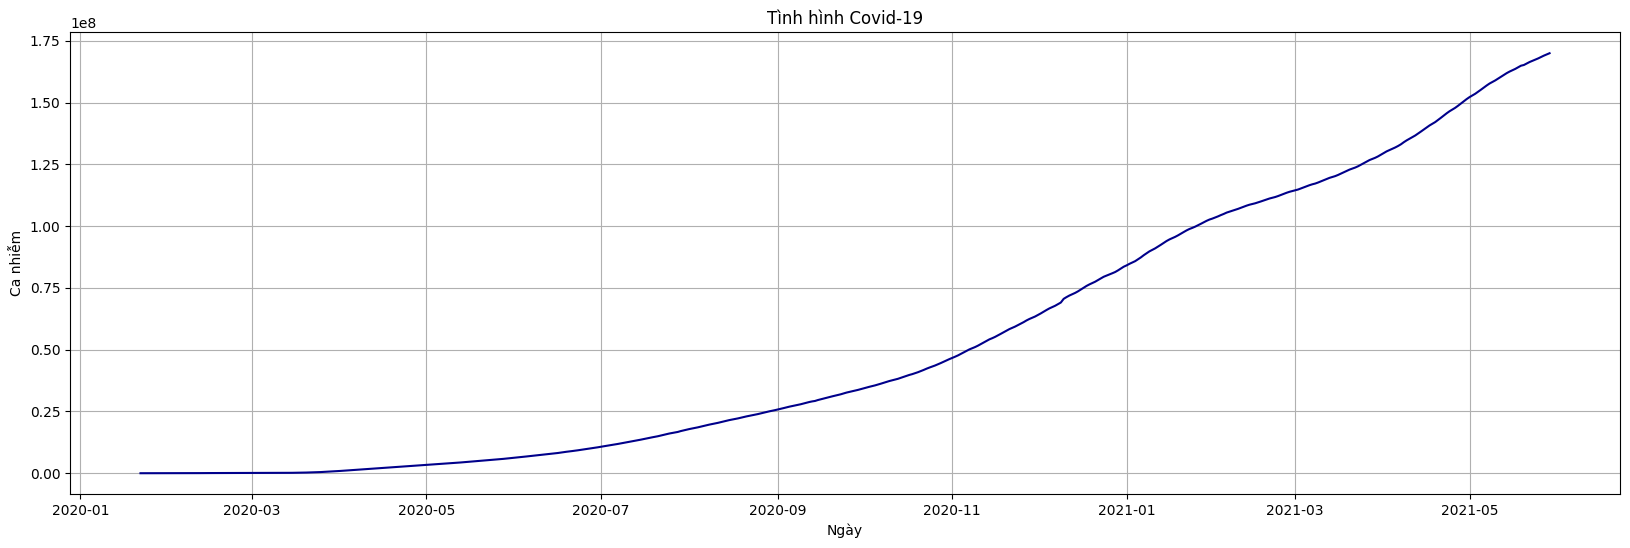

In [2]:
# Trực quan hóa phân phối của số ca nhiễm trong toàn bộ thời gian quan sát
confirmed_cases = df.groupby('ObservationDate')['Confirmed'].sum()
# vẽ
plt.figure(figsize=(20,6))
plt.plot(confirmed_cases.index, confirmed_cases.values, color ='darkblue')
plt.title('Tình hình Covid-19')
plt.xlabel('Ngày')
plt.ylabel('Ca nhiễm')
plt.grid('True')
plt.show()

#### Phân tích xu hướng tăng/giảm của số ca nhiễm qua từng thời kỳ. Xác định xu hướng dài hạn của dịch bệnh trên toàn thế giới hoặc theo từng khu vực.

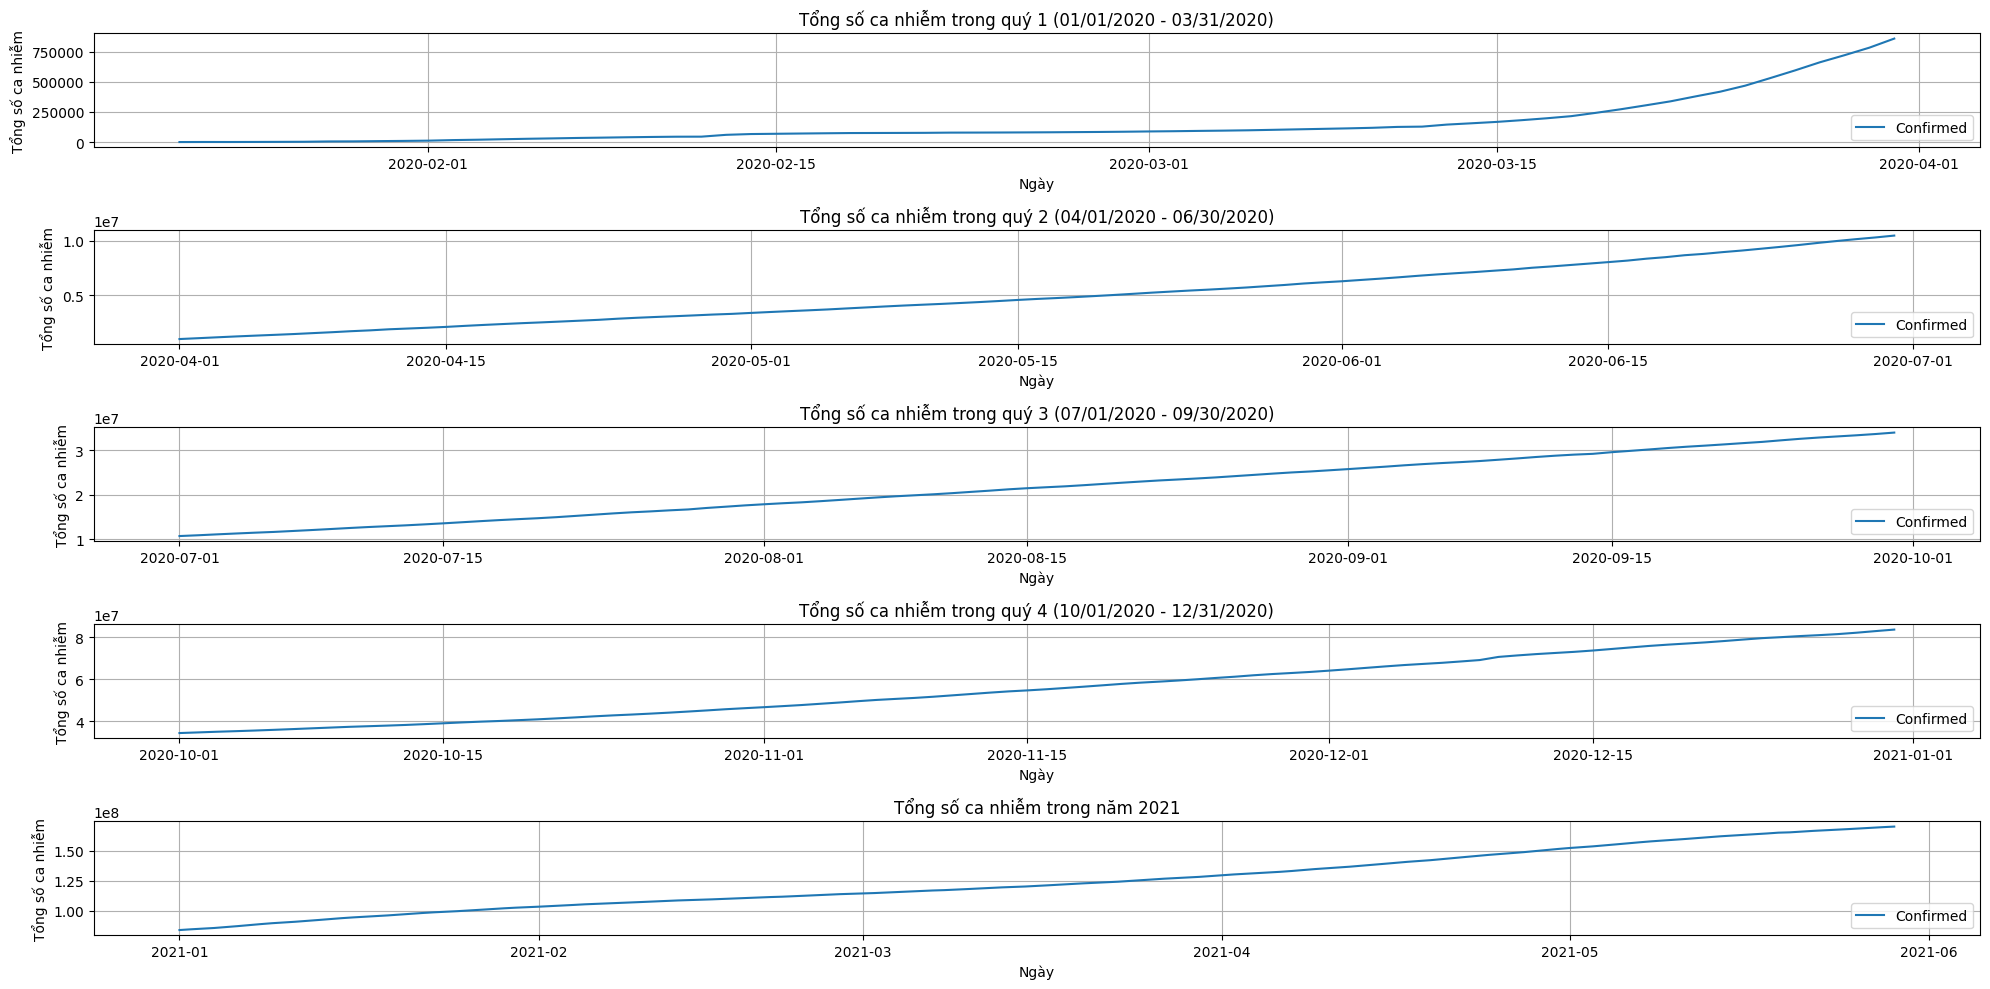

In [3]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

total = df.groupby('ObservationDate')['Confirmed'].sum()
plt.rcParams['figure.figsize']=(20,10)

#data
q1 = total.loc['01/01/2020':'03/31/2020']
q2 = total.loc['04/01/2020':'06/30/2020']
q3 = total.loc['07/01/2020':'09/30/2020']
q4 = total.loc['10/01/2020':'12/31/2020']
y2021 = total.loc['01/01/2021':'05/29/2021']


# Plot each quarter
plt.subplot(5, 1, 1)
plt.plot(q1.index, q1.values, label="Confirmed")
plt.title('Tổng số ca nhiễm trong quý 1 (01/01/2020 - 03/31/2020)')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(q2.index, q2.values, label="Confirmed")
plt.title('Tổng số ca nhiễm trong quý 2 (04/01/2020 - 06/30/2020)')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(q3.index, q3.values, label="Confirmed")
plt.title('Tổng số ca nhiễm trong quý 3 (07/01/2020 - 09/30/2020)')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(q4.index, q4.values, label="Confirmed")
plt.title('Tổng số ca nhiễm trong quý 4 (10/01/2020 - 12/31/2020)')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(y2021.index, y2021.values, label="Confirmed")
plt.title('Tổng số ca nhiễm trong năm 2021')
plt.xlabel('Ngày')
plt.ylabel('Tổng số ca nhiễm')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()


#### Hiển thị phân phối và biến động của số ca tử vong trên toàn thế giới hoặc theo từng quốc gia. Xác định các outlier nếu có.

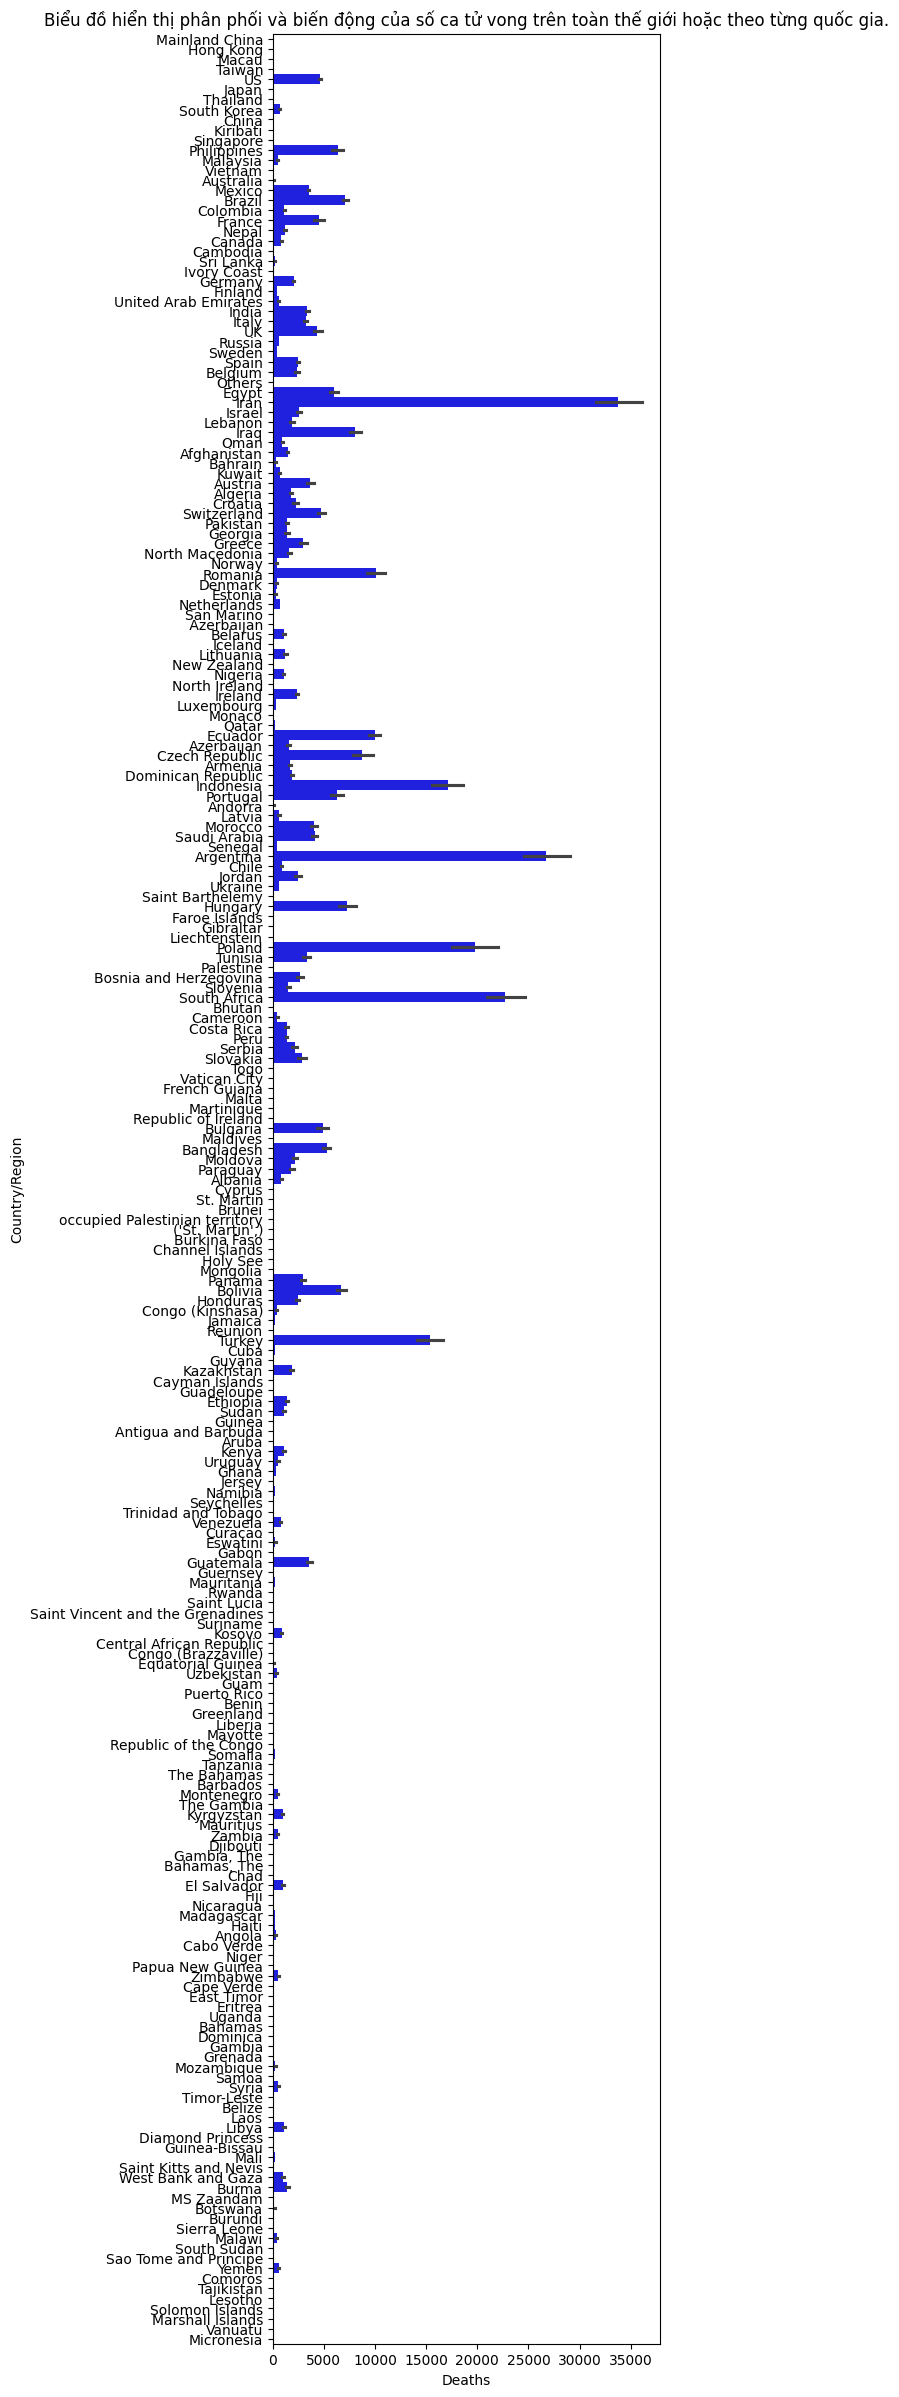

In [4]:
deaths_case = df[['Country/Region', 'Deaths']]

plt.figure(figsize=(5, 30))
sns.barplot(x='Deaths', y='Country/Region',data=data, color='b', width=1)

plt.xticks(rotation=0)

plt.title("Biểu đồ hiển thị phân phối và biến động của số ca tử vong trên toàn thế giới hoặc theo từng quốc gia.")

plt.show()

#### Trực quan hóa mật độ phân phối của số ca phục hồi qua các ngày/tháng. So sánh mật độ phân phối giữa các quốc gia hoặc khu vực khác nhau.

Text(0.5, 1.0, 'Số ca phục hồi qua tháng')

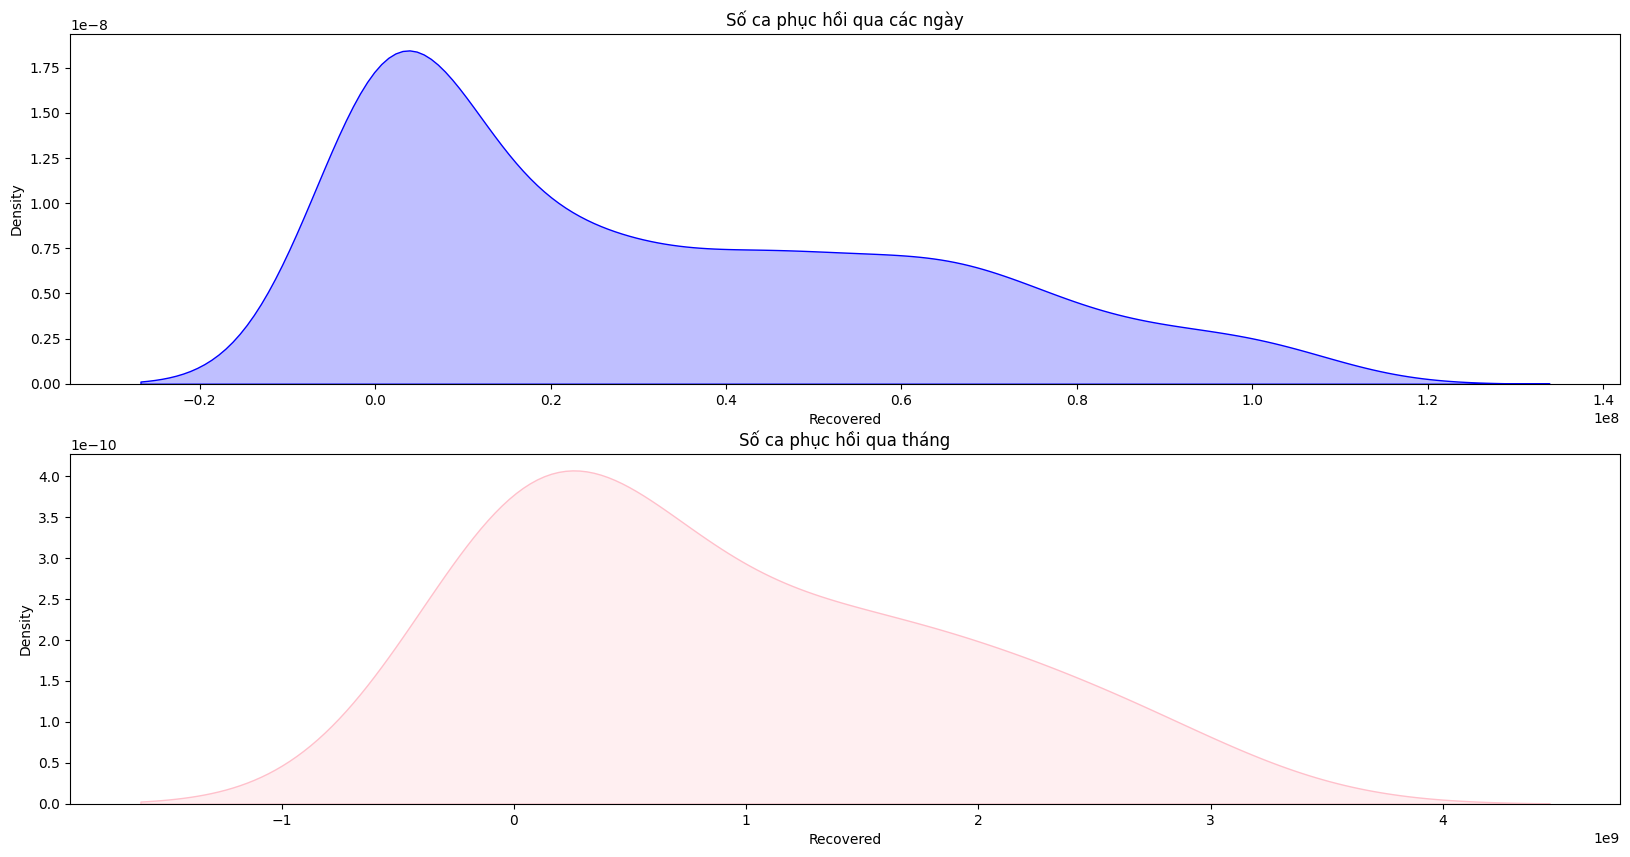

In [5]:

df['Thang_nam'] = df['ObservationDate'].dt.to_period('M')
hoi_phuc_thang = df.groupby('Thang_nam')['Recovered'].sum()
hoi_phuc = df.groupby('ObservationDate')['Recovered'].sum()


plt.rcParams['figure.figsize'] =(20,10)


plt.subplot(2, 1, 1)
sns.kdeplot(hoi_phuc, color='blue',fill=True)
plt.title('Số ca phục hồi qua các ngày')


plt.subplot(2, 1, 2)
sns.kdeplot(hoi_phuc_thang, color='pink',fill=True)
plt.title('Số ca phục hồi qua tháng')


Text(0.5, 1.0, 'Mật độ phân phối các quốc gia Đông Á')

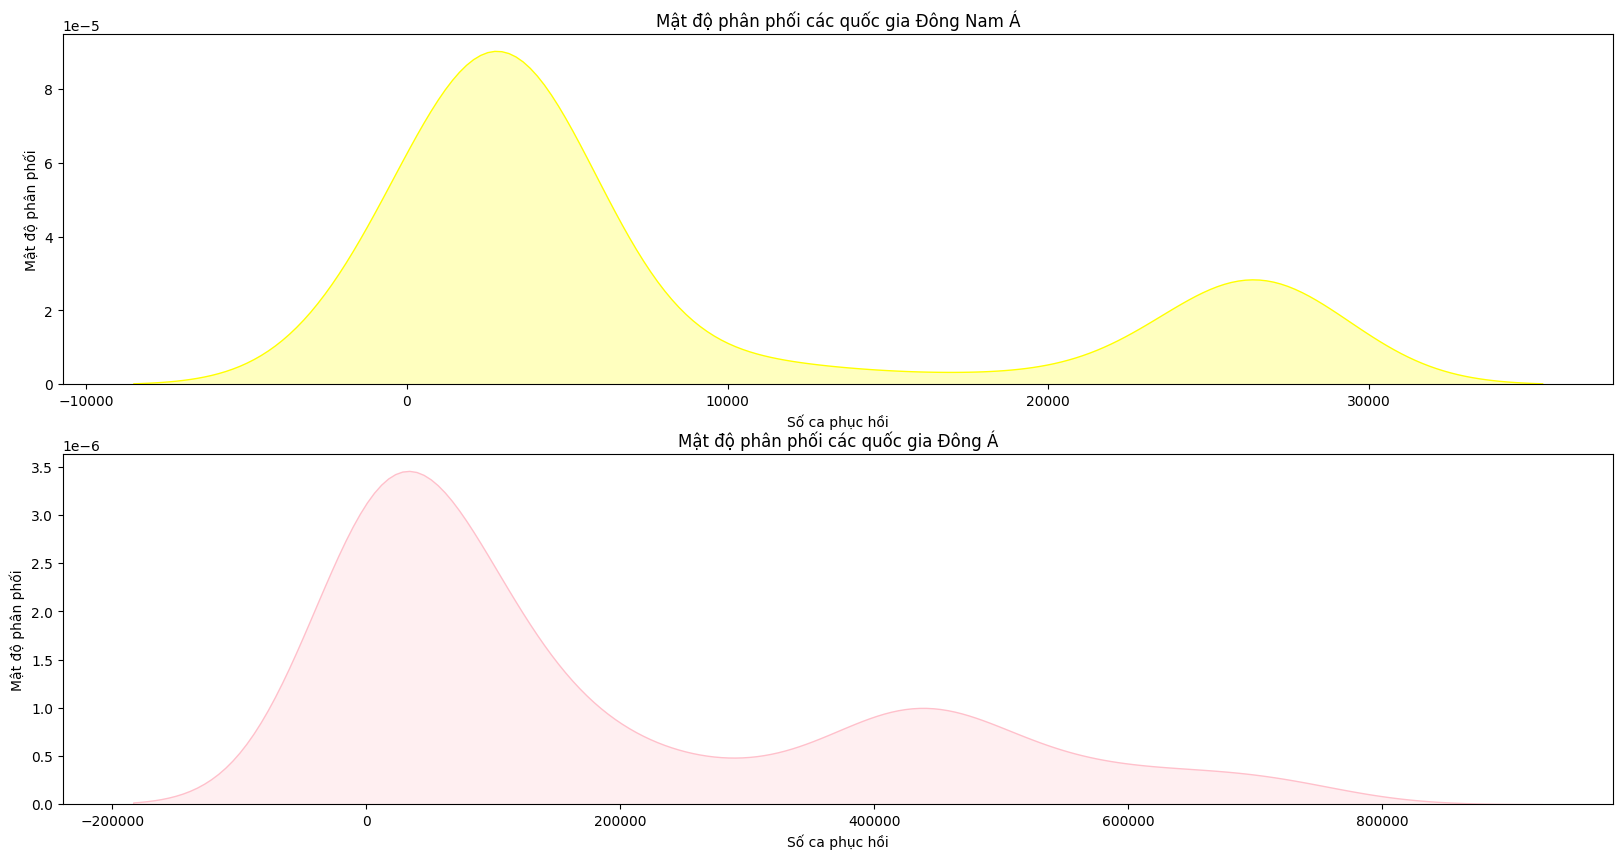

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)

# mật độ phân phối số ca phục hồi của Đông Nam Á
sea_countries = ['Brunei', 'Philippines', 'Cambodia', 'Singapore', 'Malaysia', 'Vietnam', 'Thailand']
for country in sea_countries:
    data1 =df[df['Country/Region']==country].groupby('ObservationDate')['Recovered'].sum()

plt.subplot(2,1,1)
sns.kdeplot(data1, color='yellow',fill=True)
plt.xlabel('Số ca phục hồi')
plt.ylabel('Mật độ phân phối')
plt.title('Mật độ phân phối các quốc gia Đông Nam Á')



# mật độ phân phối số ca phục hồi của Đông Á
east_countries = ['Mainland China', 'Taiwan', 'South Korea', 'Japan']
for country in east_countries:
    data2 =df[df['Country/Region']==country].groupby('ObservationDate')['Confirmed'].sum()

plt.subplot(2,1,2)
sns.kdeplot(data2, color='pink',fill=True)
plt.xlabel('Số ca phục hồi')
plt.ylabel('Mật độ phân phối')
plt.title('Mật độ phân phối các quốc gia Đông Á')

## Y1_2


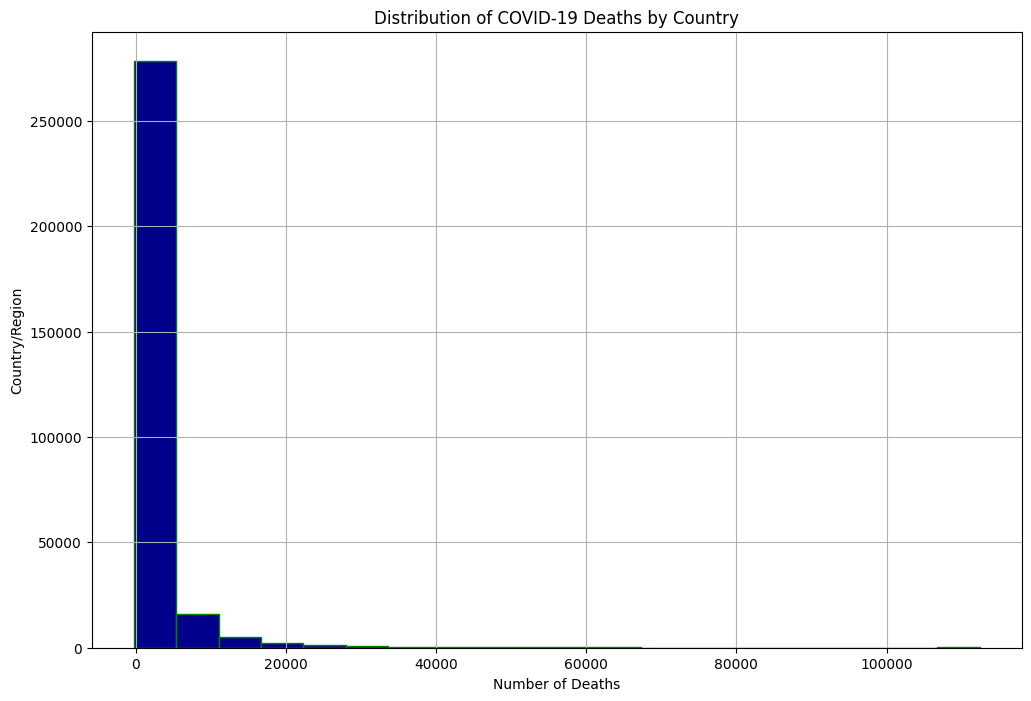

In [7]:
# Chuyển đổi cột 'ObservationDate' sang kiểu datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Biểu đồ boxplot để hiển thị phân phối số ca tử vong theo từng quốc gia
plt.figure(figsize=(12, 8))
plt.hist(df['Deaths'], bins=20, color= 'darkblue', edgecolor='g')
plt.title('Distribution of COVID-19 Deaths by Country')
plt.xlabel('Number of Deaths')
plt.ylabel('Country/Region')
plt.grid(True)
plt.show()



#### Hiển thị xu hướng tăng/giảm của số ca nhiễm theo từng ngày/tháng. Phân tích biến động của dữ liệu trong thời gian dài.

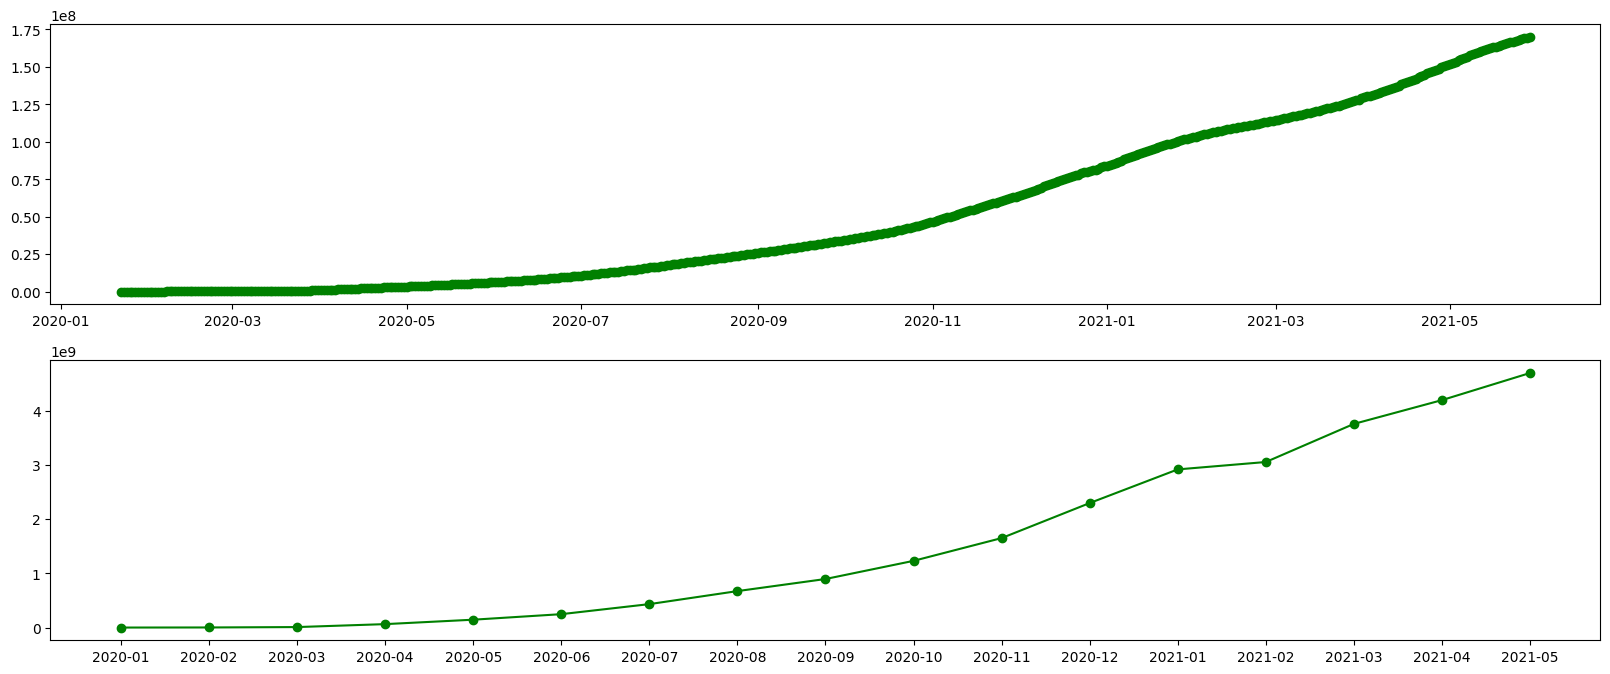

In [8]:
daily_cases = data.groupby('ObservationDate')['Confirmed'].sum()

monthly_case = data.groupby(data['ObservationDate'].dt.to_period('M'))['Confirmed'].sum()

# print(monthly_case)

plt.rcParams['figure.figsize'] = (20, 8)

# Xu hướng tăng giảm theo ngày
plt.subplot(2, 1, 1)
plt.plot(daily_cases.index, daily_cases, linestyle='-', marker= 'o', label="Ca mac theo ngay", color='g')

# Xu hướng tăng giảm theo tháng
plt.subplot(2, 1, 2)
plt.plot(monthly_case.index.astype(str), monthly_case, linestyle='-', marker= 'o', label="Ca mac theo thang", color='g')

#### Phân tích xu hướng tăng/giảm của số ca nhiễm qua từng thời kỳ. Xác định xu hướng dài hạn của dịch bệnh trên toàn thế giới hoặc theo từng khu vực.

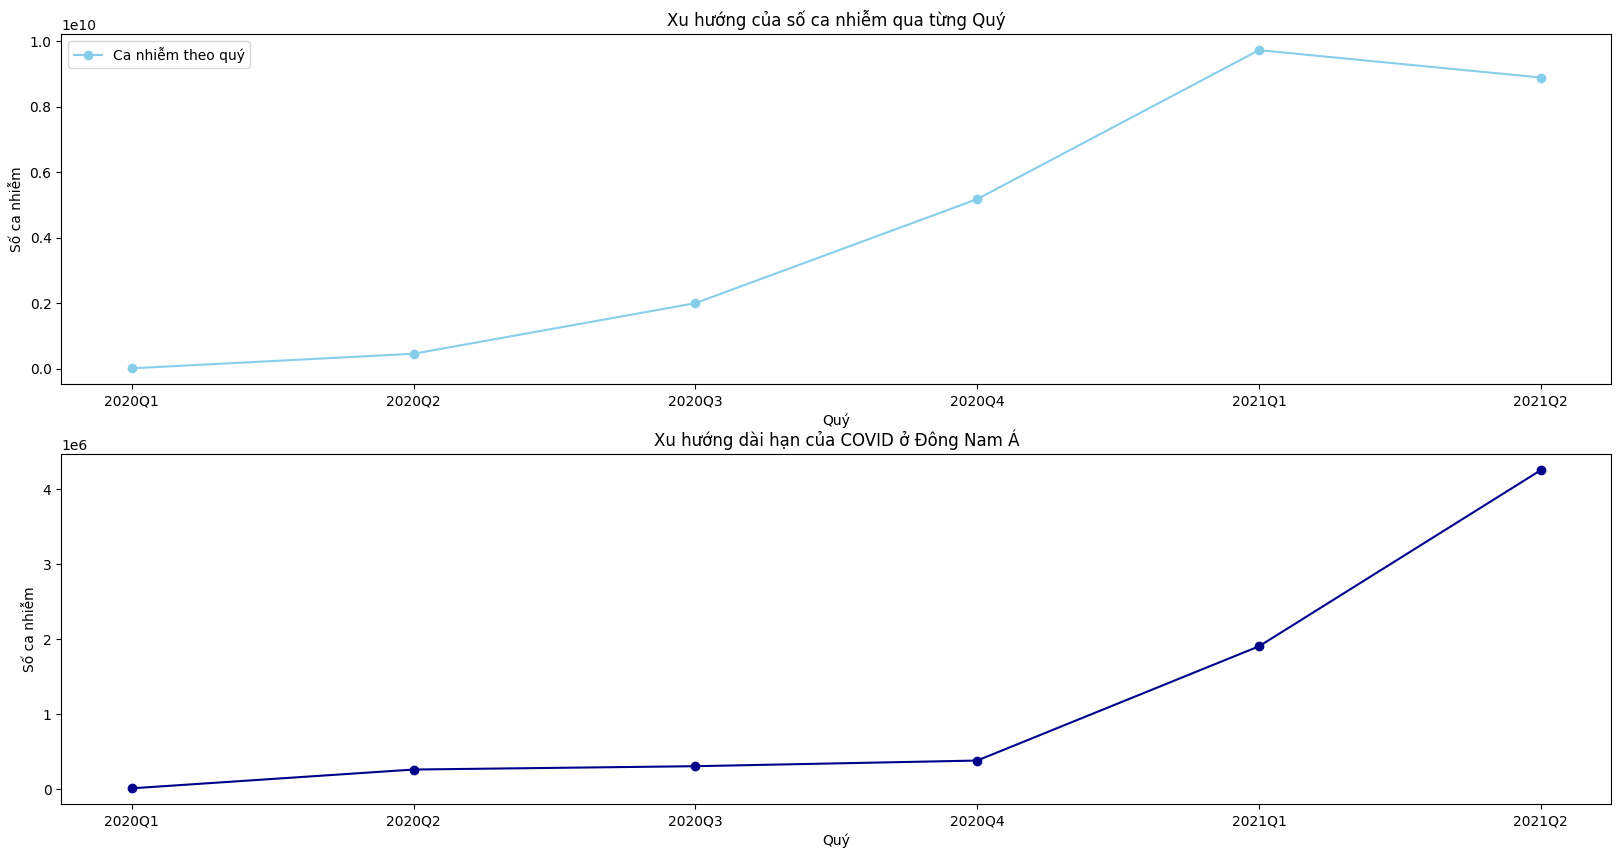

In [9]:
day_case = df.groupby('ObservationDate')['Confirmed'].sum()
quater_case = df.groupby(df['ObservationDate'].dt.to_period('Q'))['Confirmed'].sum()

plt.rcParams['figure.figsize']= (20,10)

# ca nhiễm qua từng quý
plt.subplot(2,1,1)
plt.plot(quater_case.index.astype(str), quater_case, linestyle='-', marker ='o',\
          label='Ca nhiễm theo quý', color='skyblue')
plt.xlabel('Quý')
plt.ylabel('Số ca nhiễm')
plt.title('Xu hướng của số ca nhiễm qua từng Quý')
plt.legend()

# Khu vực Đông Nam Á
sea_countries = ['Brunei', 'Philippines', 'Cambodia', 'Singapore', 'Malaysia', 'Vietnam', 'Thailand']
for country in sea_countries:
    data1 =df[df['Country/Region']==country].groupby(df['ObservationDate'].dt.to_period('Q'))['Confirmed'].sum()

plt.subplot(2,1,2)
plt.plot(data1.index.astype(str), data1, color ='darkblue',marker = 'o')
plt.xlabel('Quý')
plt.ylabel('Số ca nhiễm')
plt.title('Xu hướng dài hạn của COVID ở Đông Nam Á')

plt.show()

#### Trực quan hóa mùa vụ hoặc xu hướng lặp lại hàng năm của số ca tử vong. Xác định liệu có sự biến đổi theo mùa trong dịch bệnh không.

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

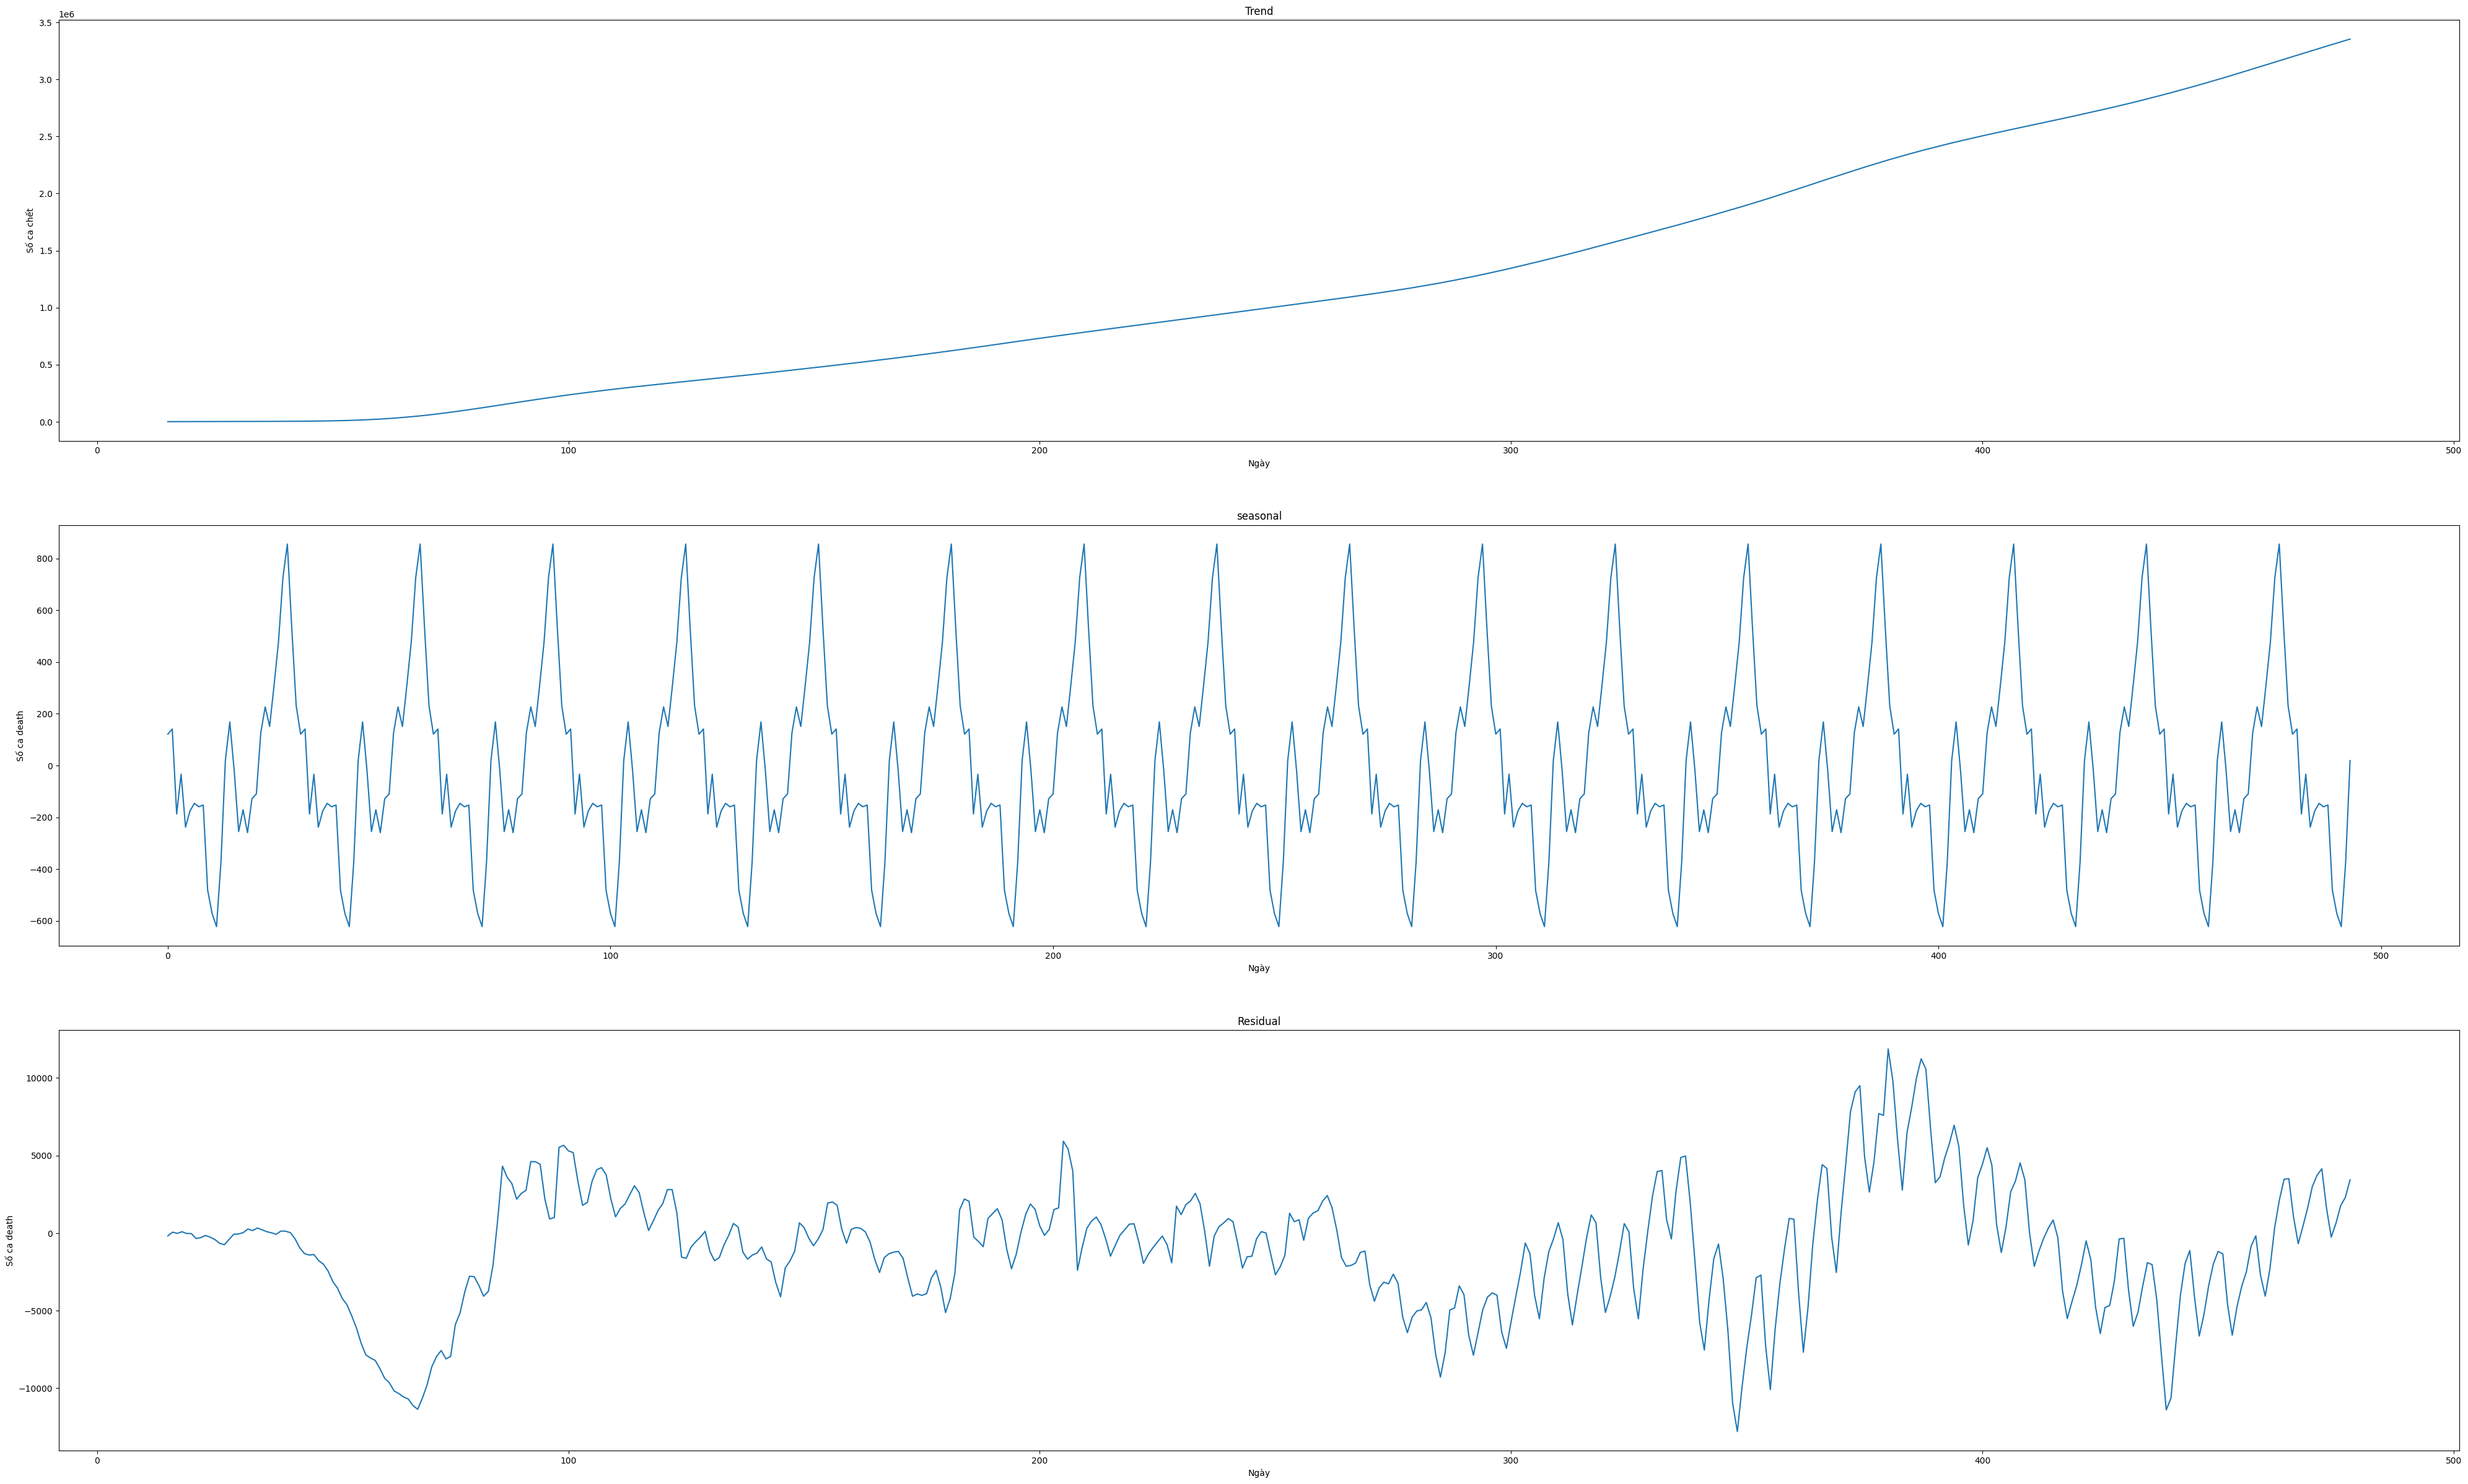

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_cases = data.groupby('ObservationDate')['Deaths'].sum()

result = seasonal_decompose(daily_cases.values,model='additive',period=30)

plt.rcParams['figure.figsize'] =(50,30)
plt.subplot(3,1,1)
plt.plot(result.trend,label = 'Trend')
plt.title("Trend")
plt.xlabel('Ngày')
plt.ylabel('Số ca chết')
plt.legend

plt.subplot(3,1,2)
plt.plot(result.seasonal,label = 'Seasonal')
plt.title("seasonal")
plt.xlabel('Ngày')
plt.ylabel('Số ca death')
plt.legend

plt.subplot(3,1,3)
plt.plot(result.resid,label = 'Residual')
plt.title("Residual")
plt.xlabel('Ngày')
plt.ylabel('Số ca death')
plt.legend

# Y1_03


#### Phân tích phân phối của tỷ lệ ca phục hồi so với tổng số ca nhiễm. So sánh tỷ lệ phục hồi giữa các quốc gia hoặc khu vực.

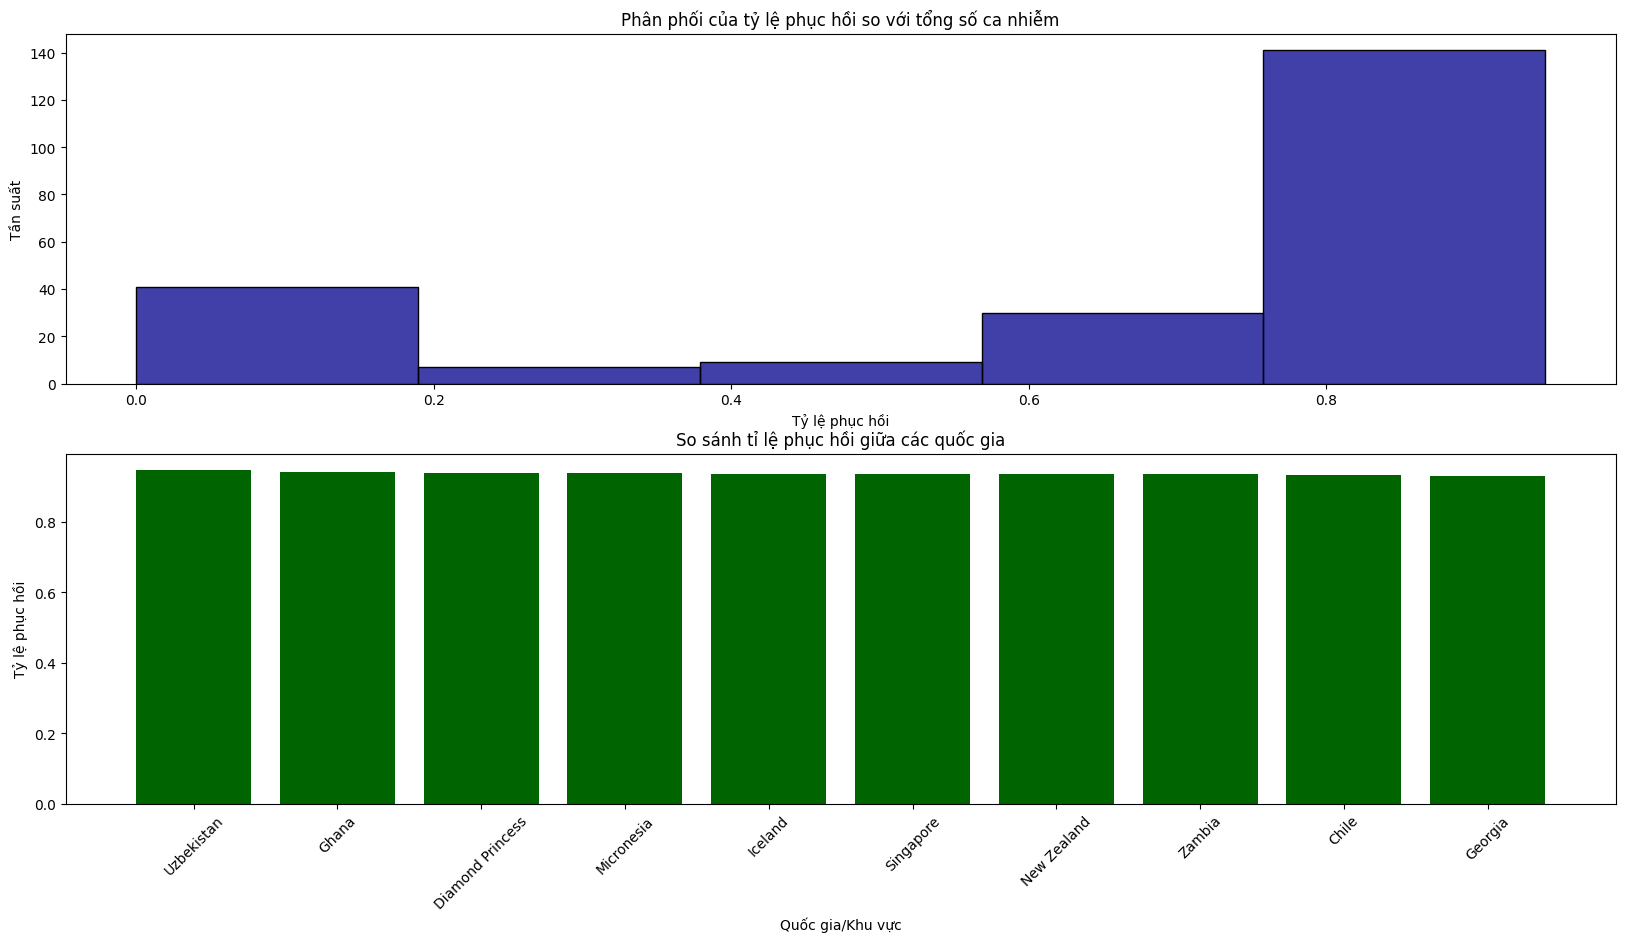

In [11]:
ratio_rc = df.groupby('Country/Region')[['Recovered', 'Confirmed']].sum()

ratio_rc['Ratio'] = ratio_rc['Recovered'] / ratio_rc['Confirmed']
top10 = ratio_rc.nlargest(10,'Ratio')
top10 =pd.DataFrame(top10)

plt.rcParams['figure.figsize']=(20,10)

plt.subplot(2,1,1)
sns.histplot(ratio_rc['Ratio'], bins= 5, color= 'darkblue')
plt.title('Phân phối của tỷ lệ phục hồi so với tổng số ca nhiễm')
plt.xlabel('Tỷ lệ phục hồi')
plt.ylabel('Tần suất')

plt.subplot(2,1,2)
plt.bar(top10.index, top10['Ratio'], color = 'darkgreen')
plt.title('So sánh tỉ lệ phục hồi giữa các quốc gia')
plt.xlabel('Quốc gia/Khu vực')
plt.ylabel('Tỷ lệ phục hồi')
plt.xticks(rotation = 45)

plt.show()


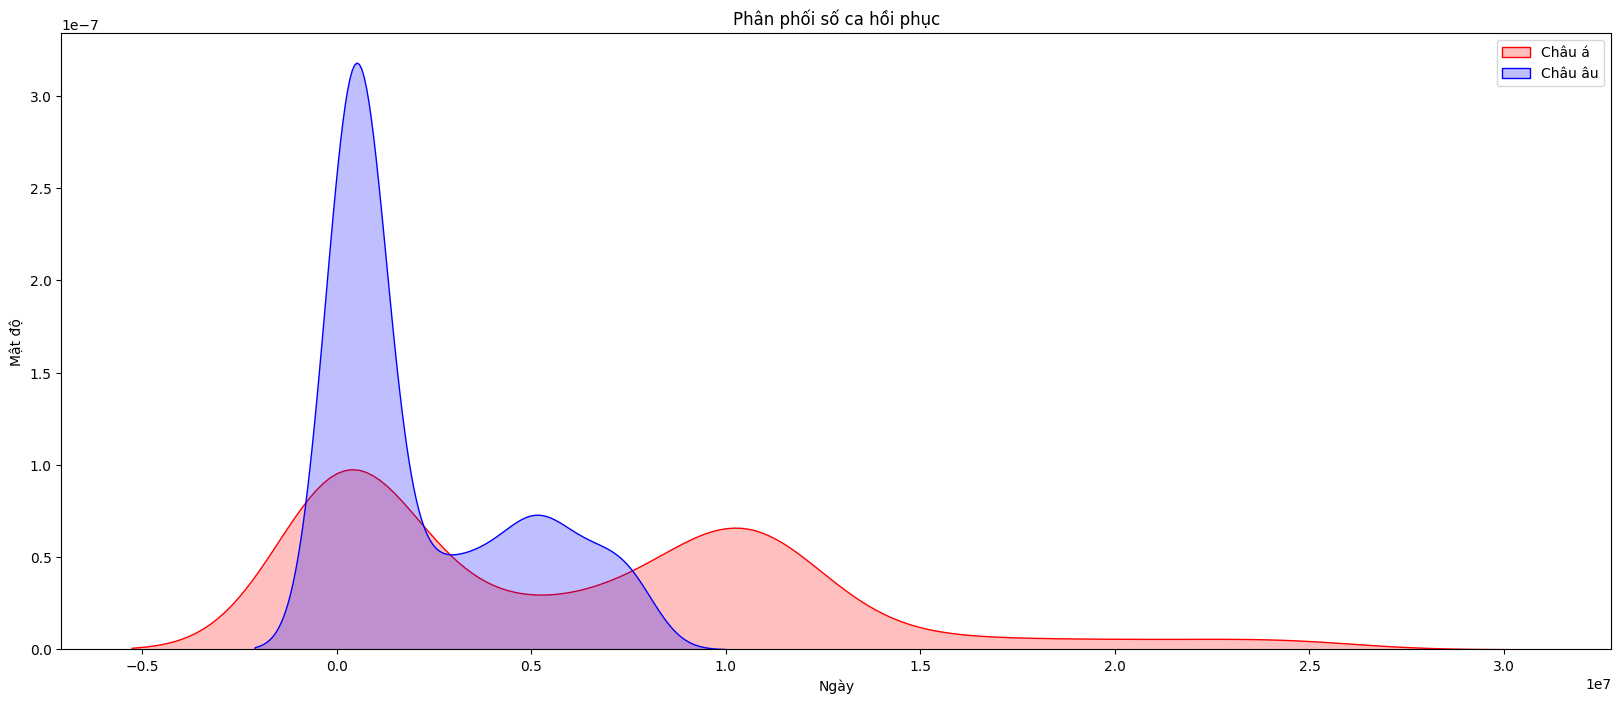

In [12]:
plt.rcParams['figure.figsize'] = (20, 8)

# Châu á
asia_countries = ['China', 'japan','South Korea', 'India', 'Thailand', 'Singapore']
asia_data = df[df['Country/Region'].isin(asia_countries)]
recovery_cases_asia = asia_data.groupby('ObservationDate')['Recovered'].sum()

# Châu âu
europe_countries = ['Italy', 'Spain','Germany', 'France', 'United Kingdom', 'Netherlands']
europe_data = df[df['Country/Region'].isin(europe_countries)]
recovery_cases_europe = europe_data.groupby('ObservationDate')['Recovered'].sum()

#visualization
sns.kdeplot(data=recovery_cases_asia, color='r', label='Châu á', fill=True)
sns.kdeplot(data=recovery_cases_europe, color='b', label='Châu âu', fill=True)

plt.title('Phân phối số ca hồi phục')
plt.xlabel('Ngày')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

#### Trực quan hóa xu hướng tăng/giảm của số ca nhiễm trong các khu vực cụ thể. So sánh sự biến động của dịch bệnh giữa các khu vực.

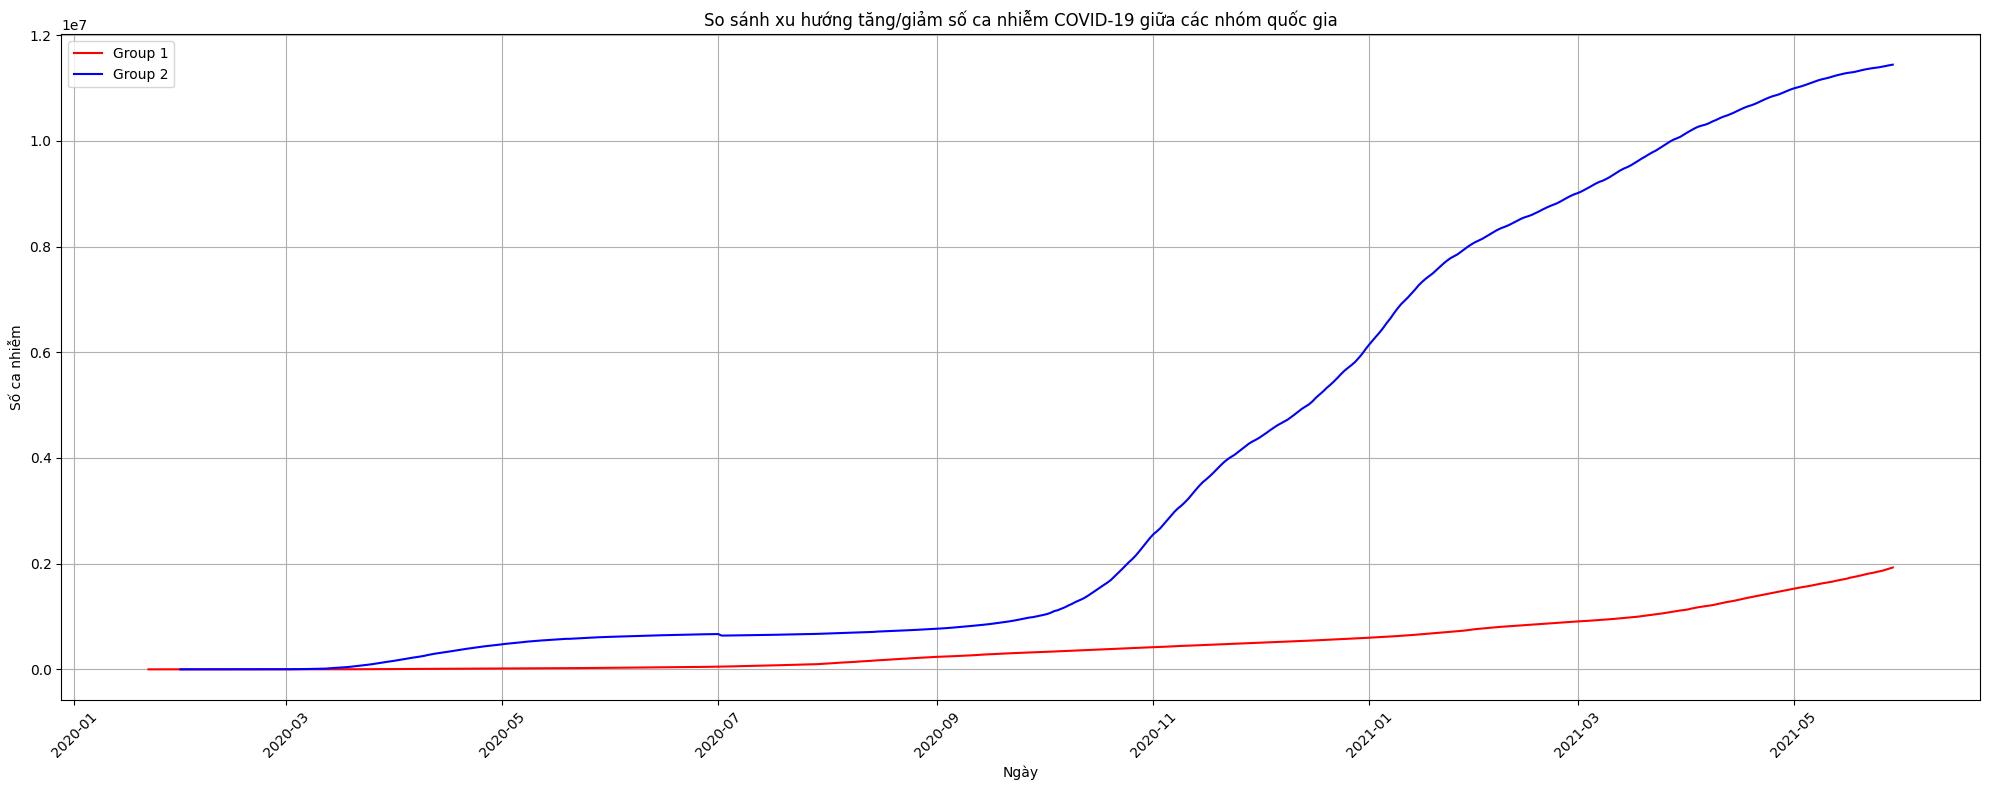

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)

countries_compare1 = ['VietNam', 'Thailand', 'Philippines', 'Malaysia']
countries_compare2 = ['UK', 'Italy', 'Swiss', 'Netherlands', 'Belgium']

# Tạo các biến để lưu trữ dữ liệu tổng hợp của các khu vực
total_data1 = df[df['Country/Region'].isin(countries_compare1)].groupby("ObservationDate")['Confirmed'].sum()
total_data2 = df[df['Country/Region'].isin(countries_compare2)].groupby("ObservationDate")['Confirmed'].sum()

# Vẽ plot cho các khu vực tổng hợp
plt.plot(total_data1.index, total_data1, label='Group 1', color='red')
plt.plot(total_data2.index, total_data2, label='Group 2', color='blue')

plt.title('So sánh xu hướng tăng/giảm số ca nhiễm COVID-19 giữa các nhóm quốc gia')
plt.xlabel('Ngày')
plt.ylabel('Số ca nhiễm')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
